***Sam Cressman Capstone Project: Shelter Animal Outcomes***

***Help improve outcomes for shelter animals***

***Capstone inspiration:*** [Kaggle](https://www.kaggle.com/c/shelter-animal-outcomes)

[Intake data (pulled 6/25/18)](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) <br>
[Outcome data (pulled 6/25/18)](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) <br>

"Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners. The Outcomes data set reflects that Austin, TX. is the largest "No Kill" city in the country." ([link](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238))

***Graphing/EDA Notebook***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
animals_graphing = pd.read_csv("../CSVs/cleaned_animals_pre_numeric_pre_dummies.csv")

In [3]:
# Quick check

animals_graphing.head();

In [4]:
# Changing back to DateTimes

animals_graphing["Intake Time"] = pd.to_datetime(animals_graphing["Intake Time"]).dt.date
animals_graphing["Outcome Time"] = pd.to_datetime(animals_graphing["Outcome Time"]).dt.date
animals_graphing["Date of Birth"] = pd.to_datetime(animals_graphing["Date of Birth"]).dt.date

***Intake Animal Types***

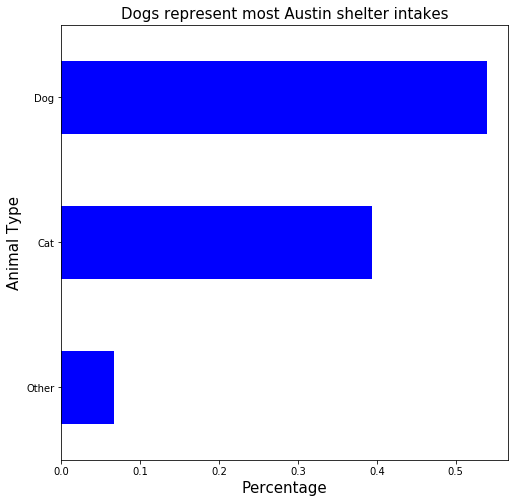

In [5]:
# Intake Animal Types

animal_type_count = animals_graphing["Animal Type"].value_counts(normalize = True).reset_index().sort_values(by = "Animal Type")

animal_type_count.plot(kind = "barh", x = "index", y = "Animal Type", legend = False, color = "blue", figsize = (8, 8))

plt.title("Dogs represent most Austin shelter intakes", fontsize = 15)
plt.xlabel("Percentage", fontsize = 15)
plt.ylabel("Animal Type", fontsize = 15)

plt.show()

***Outcome Type***

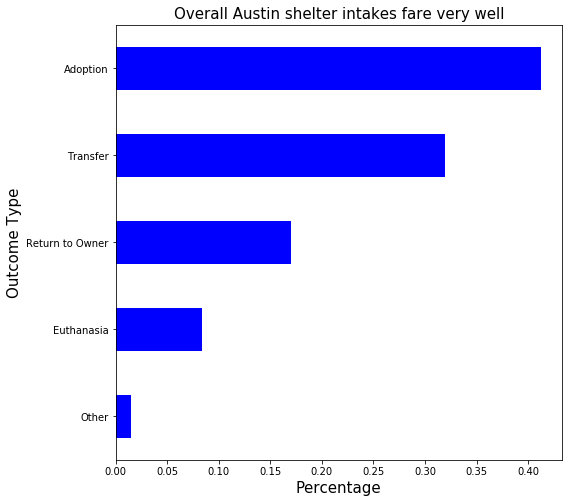

In [6]:
# Overall Outcome Type percentages

outcome_counts = animals_graphing["Outcome Type"].value_counts(normalize = True).reset_index().sort_values(by = "Outcome Type")

outcome_counts.plot(kind = "barh", x = "index", y = "Outcome Type", color = "blue", figsize = (8, 8), legend = False)

plt.title("Overall Austin shelter intakes fare very well", fontsize = 15)
plt.xlabel("Percentage", fontsize = 15)
plt.ylabel("Outcome Type", fontsize = 15)

plt.show()

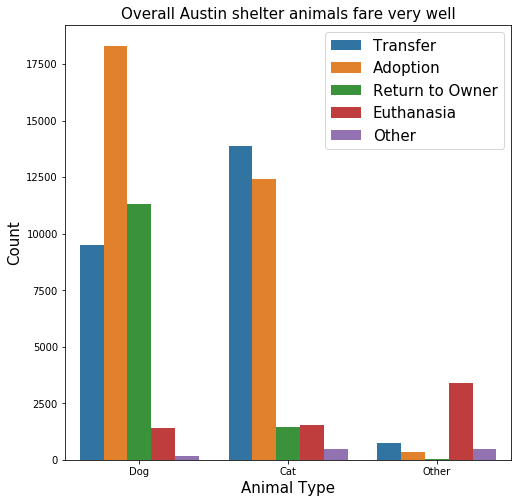

In [7]:
# Overall outcome types

plt.figure(figsize=(8, 8))

sns.countplot(x = "Animal Type", data = animals_graphing, hue = "Outcome Type")

plt.title("Overall Austin shelter animals fare very well", fontsize = 15)
plt.xlabel("Animal Type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.legend(loc = 1, fontsize = 15)

plt.show()

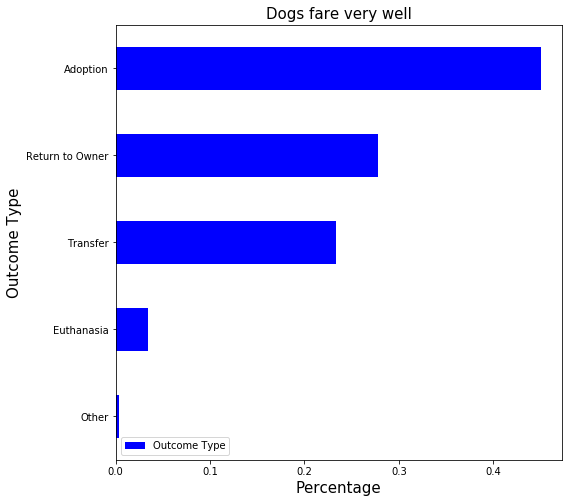

In [8]:
# Dog outcomes

mask = animals_graphing[animals_graphing["Animal Type"] == "Dog"]

dog_outcomes = mask["Outcome Type"].value_counts(normalize = True).reset_index().sort_values(by = "Outcome Type")

dog_outcomes.plot(kind = "barh", x = "index", y = "Outcome Type", color = "blue", figsize = (8, 8))

plt.title("Dogs fare very well", fontsize = 15)
plt.xlabel("Percentage", fontsize = 15)
plt.ylabel("Outcome Type", fontsize = 15)

plt.show()

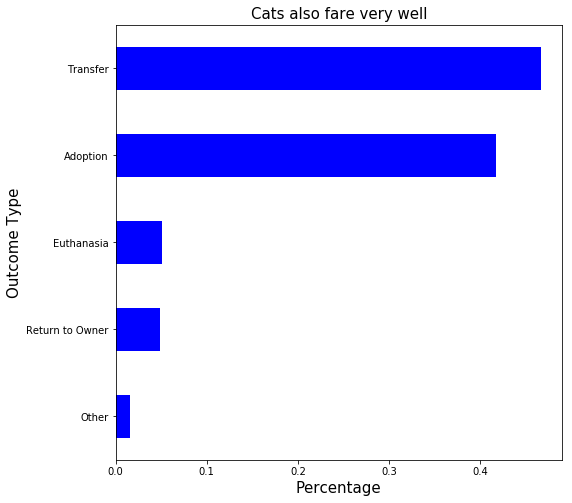

In [9]:
# Cat outcomes

mask = animals_graphing[animals_graphing["Animal Type"] == "Cat"]

cat_outcomes = mask["Outcome Type"].value_counts(normalize = True).reset_index().sort_values(by = "Outcome Type")

cat_outcomes.plot(kind = "barh", x = "index", y = "Outcome Type", color = "blue", figsize = (8, 8), legend = False)

plt.title("Cats also fare very well", fontsize = 15)
plt.xlabel("Percentage", fontsize = 15)
plt.ylabel("Outcome Type", fontsize = 15)

plt.show()

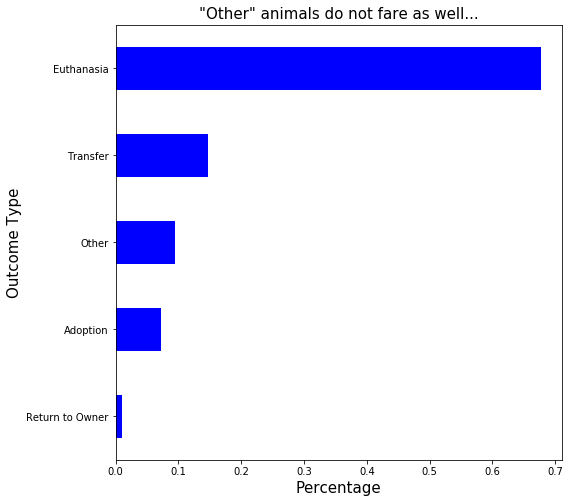

In [10]:
# Other outcomes

mask = animals_graphing[animals_graphing["Animal Type"] == "Other"]

other_outcomes = mask["Outcome Type"].value_counts(normalize = True).reset_index().sort_values(by = "Outcome Type")

other_outcomes.plot(kind = "barh", x = "index", y = "Outcome Type", color = "blue", figsize = (8, 8), legend = False)

plt.title('"Other" animals do not fare as well...', fontsize = 15)
plt.xlabel("Percentage", fontsize = 15)
plt.ylabel("Outcome Type", fontsize = 15)

plt.show()

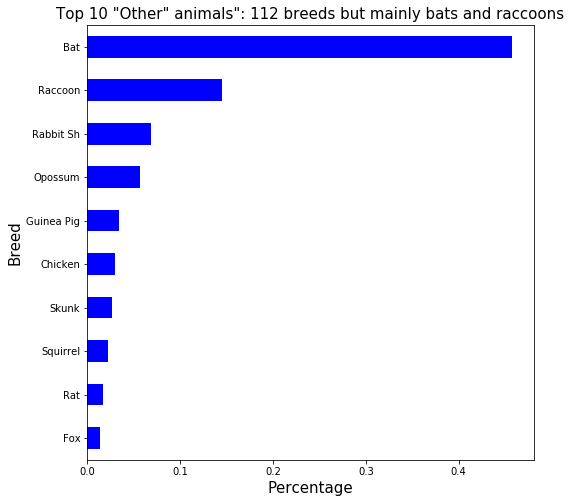

In [11]:
# Other animals

mask = animals_graphing[animals_graphing["Animal Type"] == "Other"]

mask["Breed"].nunique() # 112

other_types = mask["Breed"].value_counts(normalize = True).head(10).reset_index().sort_values(by = "Breed")

other_types.plot(kind = "barh", x = "index", y = "Breed", color = "blue", legend = False, figsize = (8, 8))

plt.title('Top 10 "Other" animals": 112 breeds but mainly bats and raccoons', fontsize = 15)
plt.xlabel("Percentage", fontsize = 15)
plt.ylabel("Breed", fontsize = 15)

plt.show()

***Outcome subtype***

In [12]:
# Half null

animals_graphing["Outcome Subtype"].isnull().sum();

In [13]:
animals_graphing["Outcome Subtype"].value_counts();

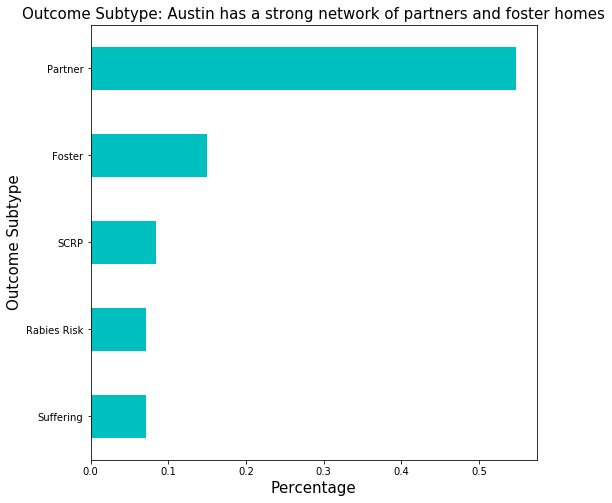

In [14]:
# Outcome Subtype

# SCRP: Austinâ€™s Stray Cat Return Program

subtype_count = animals_graphing["Outcome Subtype"].value_counts(normalize = True).head(5).reset_index().sort_values(by = "Outcome Subtype")

subtype_count.plot(kind = "barh", x = "index", y = "Outcome Subtype", color = "c", figsize = (8, 8), legend = False)

plt.title("Outcome Subtype: Austin has a strong network of partners and foster homes", fontsize = 15)
plt.xlabel("Percentage", fontsize = 15)
plt.ylabel("Outcome Subtype", fontsize = 15)

plt.show()

***Intake Type vs. Outcome Type***

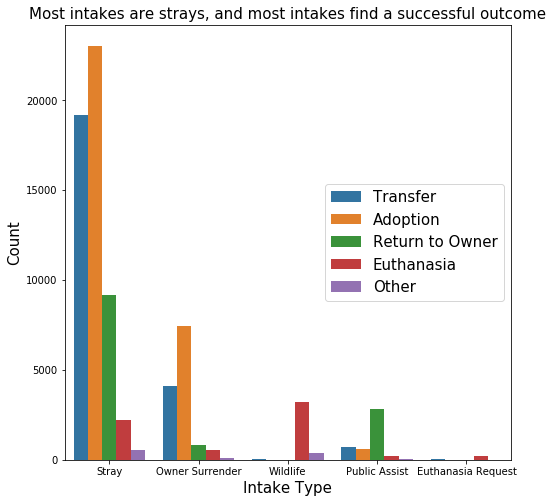

In [15]:
plt.figure(figsize=(8, 8))

plt.title("Most intakes are strays, and most intakes find a successful outcome", fontsize = 15)

sns.countplot(x = "Intake Type", data = animals_graphing, hue = "Outcome Type")

plt.xlabel("Intake Type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.legend(loc = 7, fontsize = 15)

plt.show()

***Name***

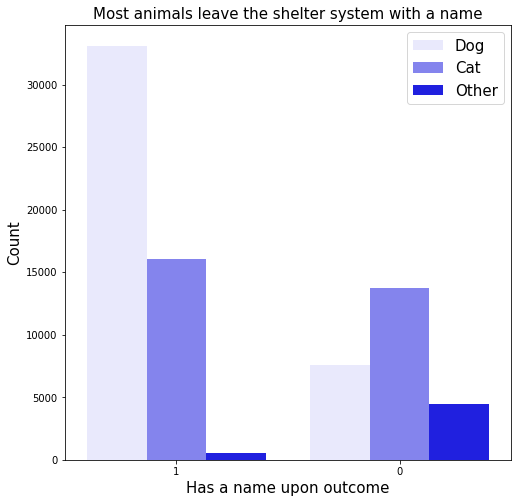

In [16]:
# Most animals do not enter the shelter system with a name, and many are not given a name even upon outcome

plt.figure(figsize=(8, 8))

sns.countplot(x = "has_name", data = animals_graphing, hue = "Animal Type", color = "b", 
             order = animals_graphing["has_name"].value_counts().index)

plt.title("Most animals leave the shelter system with a name", fontsize = 15)
plt.xlabel("Has a name upon outcome", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.legend(loc = 1, fontsize = 15)

plt.show()

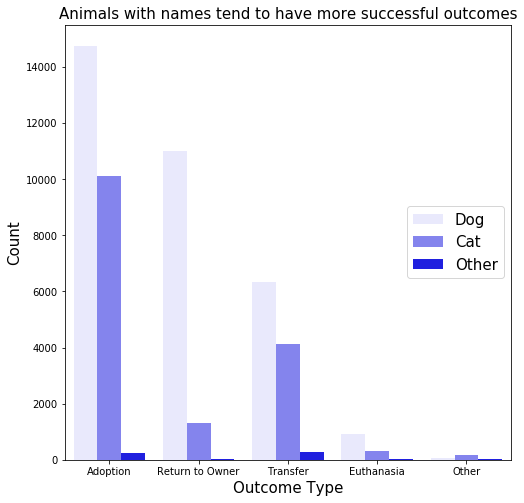

In [17]:
# Give every animal a name!

mask = animals_graphing[(animals_graphing["has_name"] == 1)]

plt.figure(figsize=(8, 8))

sns.countplot(x = "Outcome Type", data = mask, hue = "Animal Type", color = "b", 
             order = mask["Outcome Type"].value_counts().index)

plt.title("Animals with names tend to have more successful outcomes", fontsize = 15)
plt.xlabel("Outcome Type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.legend(loc = 7, fontsize = 15)

plt.show()

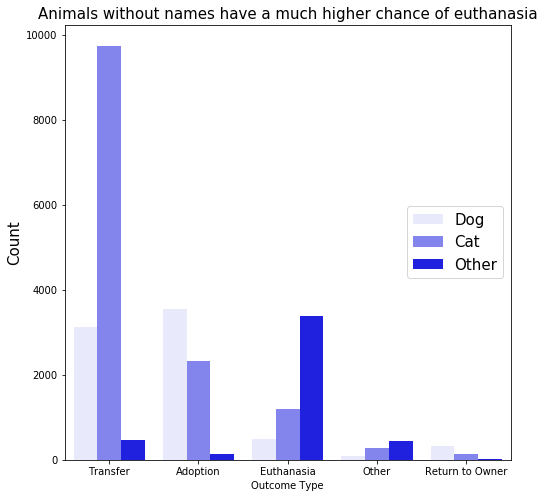

In [18]:
# Give every animal a name!

mask = animals_graphing[(animals_graphing["has_name"] == 0)]

plt.figure(figsize=(8, 8))

sns.countplot(x = "Outcome Type", data = mask, hue = "Animal Type", color = "b", 
             order = mask["Outcome Type"].value_counts().index)

plt.title("Animals without names have a much higher chance of euthanasia", fontsize = 15)
plt.xlabel("Outcome Type")
plt.ylabel("Count", fontsize = 15)
plt.legend(loc = 7, fontsize = 15)

plt.show()

***Sex upon Outcome***

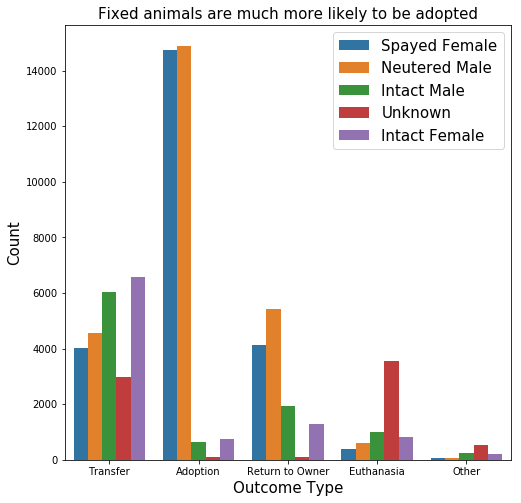

In [19]:
# Outcome based on sex

plt.figure(figsize=(8, 8))

sns.countplot(x = "Outcome Type", data = animals_graphing, hue = "Sex upon Outcome")

plt.title("Fixed animals are much more likely to be adopted", fontsize = 15)
plt.xlabel("Outcome Type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.legend(loc = 1, fontsize = 15)

plt.show()

***Intake/Outcome Time, Adoption vs. Euthanasia***

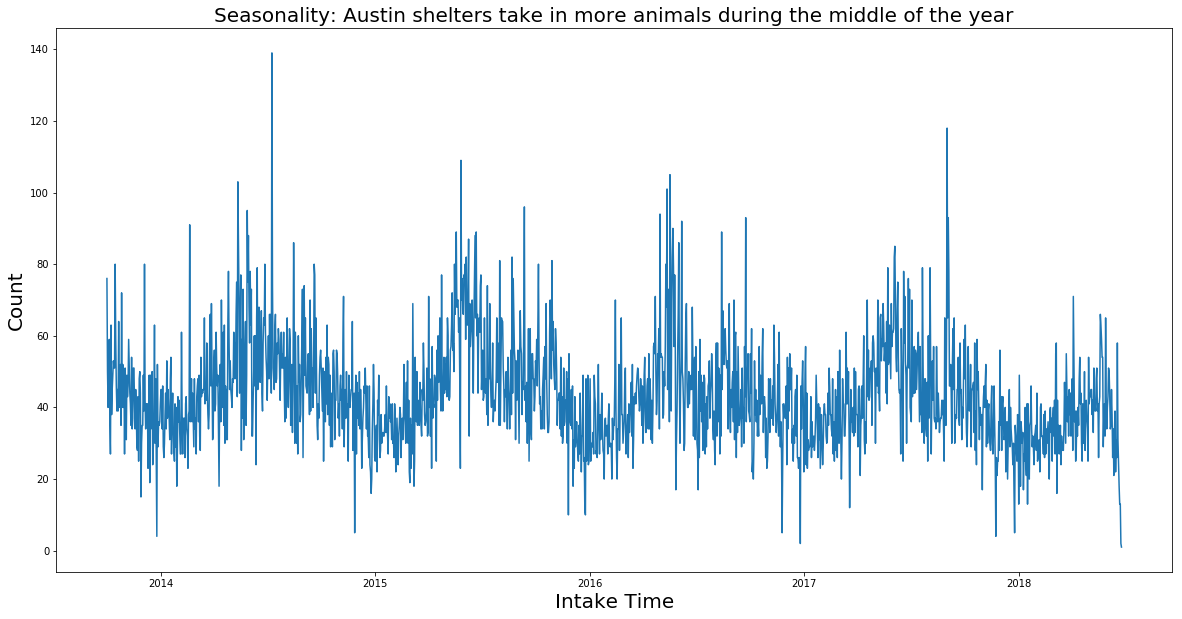

In [20]:
# Intake time

plt.figure(figsize=(20, 10))

animals_graphing["Intake Condition"].groupby(animals_graphing["Intake Time"]).count().plot(kind="line")

plt.title("Seasonality: Austin shelters take in more animals during the middle of the year", fontsize = 20)
plt.xlabel("Intake Time", fontsize = 20)
plt.ylabel("Count", fontsize = 20)

plt.show()

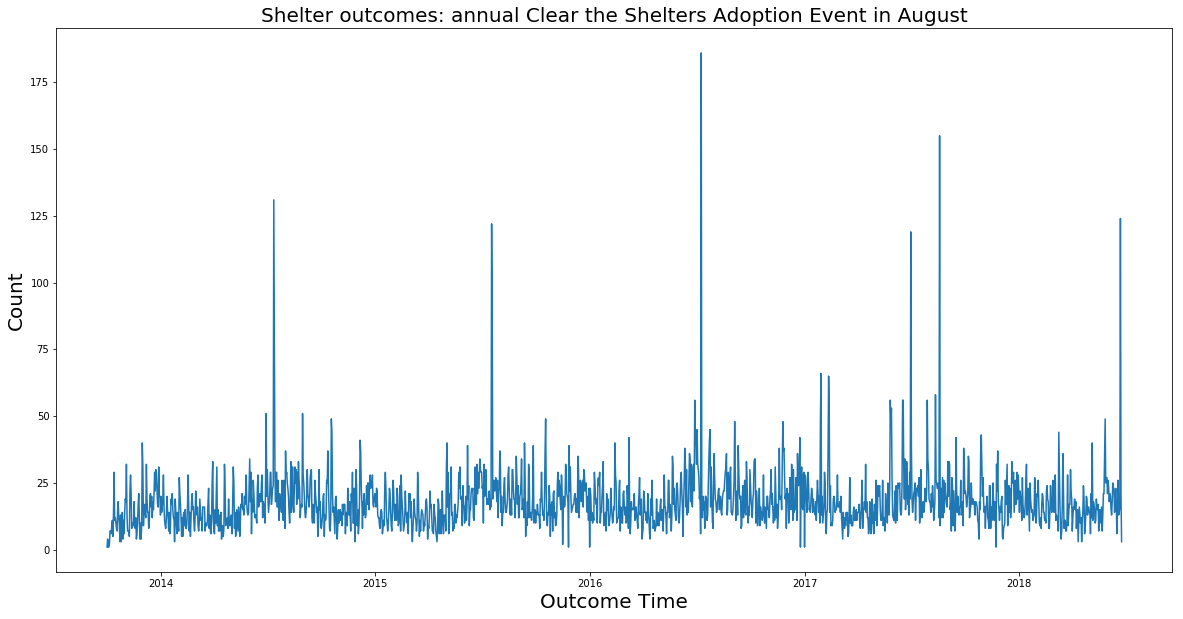

In [21]:
# Outcome Type: Adoption

mask = animals_graphing[animals_graphing["Outcome Type"] == "Adoption"]

plt.figure(figsize=(20, 10))

mask["Outcome Type"].groupby(mask["Outcome Time"]).count().plot(kind="line")

plt.title("Shelter outcomes: annual Clear the Shelters Adoption Event in August", fontsize = 20)
plt.xlabel("Outcome Time", fontsize = 20)
plt.ylabel("Count", fontsize = 20)

plt.show()

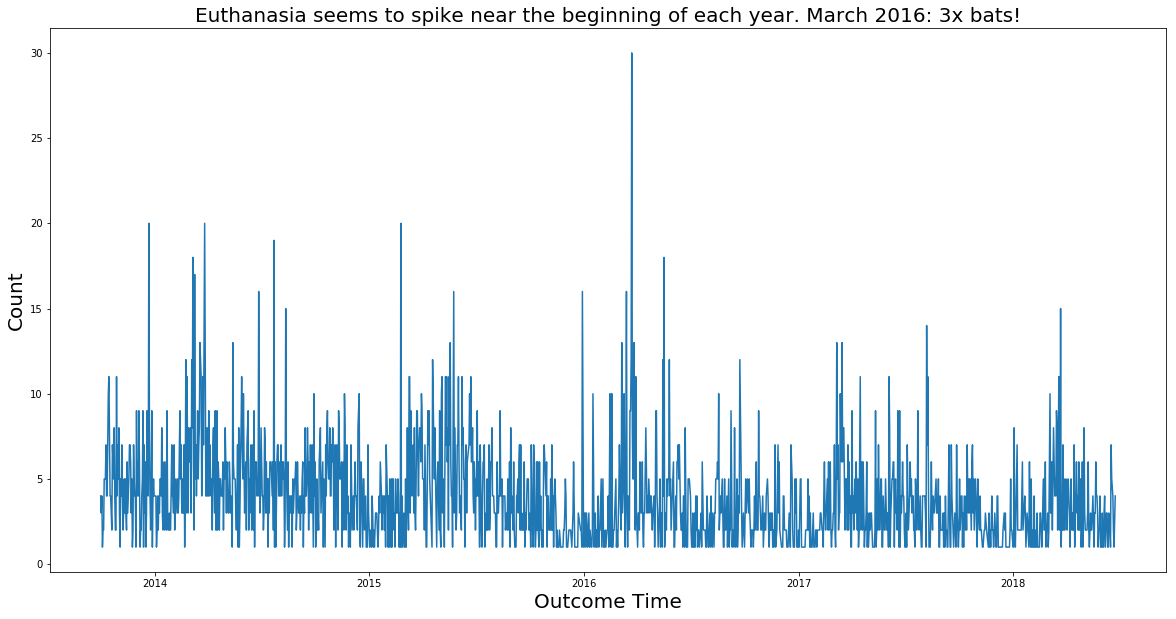

In [22]:
# Outcome Type: Euthanasia

mask = animals_graphing[animals_graphing["Outcome Type"] == "Euthanasia"]

plt.figure(figsize=(20, 10))

mask["Outcome Type"].groupby(mask["Outcome Time"]).count().plot(kind="line")

plt.title("Euthanasia seems to spike near the beginning of each year. March 2016: 3x bats!", fontsize = 20)
plt.xlabel("Outcome Time", fontsize = 20)
plt.ylabel("Count", fontsize = 20)

plt.show()

In [23]:
# Trying to explain spike in early 2016: much higher intake of wildlife, mainly bats

for i in range(1, 5):

    mask = animals_graphing[(animals_graphing["Outcome Type"] == "Euthanasia") &
                            (animals_graphing["Outcome Year"] == 2016) & 
                            (animals_graphing["Outcome Month"] == i)]
    
    print("2016 Month ", i)
    print(mask["Intake Type"].value_counts())
    print(" ")

2016 Month  1
Wildlife              33
Stray                 24
Owner Surrender        3
Euthanasia Request     3
Name: Intake Type, dtype: int64
 
2016 Month  2
Wildlife              42
Stray                 20
Owner Surrender        3
Euthanasia Request     3
Name: Intake Type, dtype: int64
 
2016 Month  3
Wildlife              149
Stray                  28
Owner Surrender        13
Public Assist          11
Euthanasia Request      2
Name: Intake Type, dtype: int64
 
2016 Month  4
Wildlife           50
Stray              31
Owner Surrender     5
Public Assist       4
Name: Intake Type, dtype: int64
 


***Animal Age vs. Outcome***

In [24]:
# Quick EDA: 2.128849008001374 years

animals_graphing["Age at Intake (Years)"].mean();

In [25]:
# 2.172001054048413 years

animals_graphing["Age at Outcome (Years)"].mean();

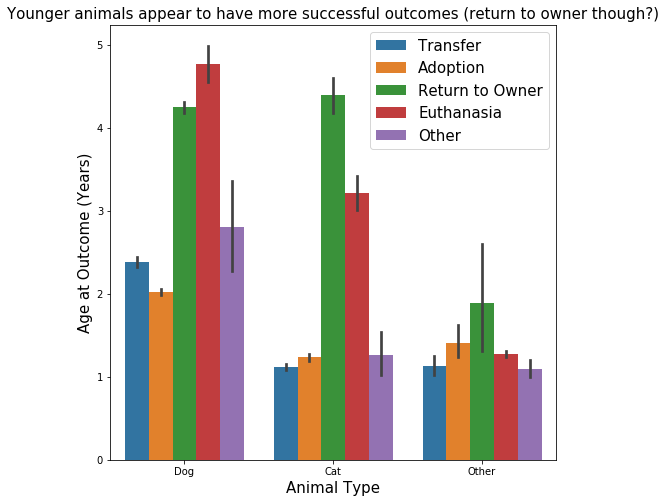

In [26]:
# Age at outcome by outcome type/animal type

plt.figure(figsize=(8, 8))

sns.barplot(y = "Age at Outcome (Years)", x = "Animal Type", hue = "Outcome Type", data = animals_graphing)

plt.title("Younger animals appear to have more successful outcomes (return to owner though?)", fontsize = 15)
plt.xlabel("Animal Type", fontsize = 15)
plt.ylabel("Age at Outcome (Years)", fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

***Length of Time In Shelter (Days)***

In [27]:
# Quick EDA: 15.39875731962587 days

animals_graphing["Length of Time In Shelter (Days)"].mean();

In [28]:
animals_graphing.groupby("Animal Type")["Length of Time In Shelter (Days)"].mean();

# Animal Type
# Cat      18.622185
# Dog      14.472946
# Other     3.837967

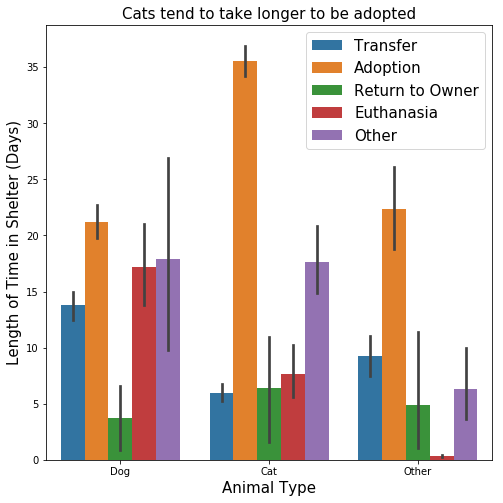

In [29]:
plt.figure(figsize=(8, 8))

sns.barplot(y = "Length of Time In Shelter (Days)", x = "Animal Type", hue = "Outcome Type", data = animals_graphing)

plt.title("Cats tend to take longer to be adopted", fontsize = 15)
plt.xlabel("Animal Type", fontsize = 15)
plt.ylabel("Length of Time in Shelter (Days)", fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

***Euthanasia***

In [30]:
# Other animals make up 6% of all intakes but account for 54% of euthanizations

animals_graphing["Animal Type"].value_counts(normalize = True);

# Dog      0.539148
# Cat      0.394134
# Other    0.066718

In [31]:
# 8% of all animals are euthanized

mask = animals_graphing[animals_graphing["Outcome Type"] == "Euthanasia"]

mask.shape; # (6334, 128)

mask.shape[0] / animals_graphing.shape[0] # Percent of animals euthanized: 0.08391404573275747

mask["Animal Type"].value_counts(normalize = True);

# Other    0.538207
# Cat      0.240448
# Dog      0.221345

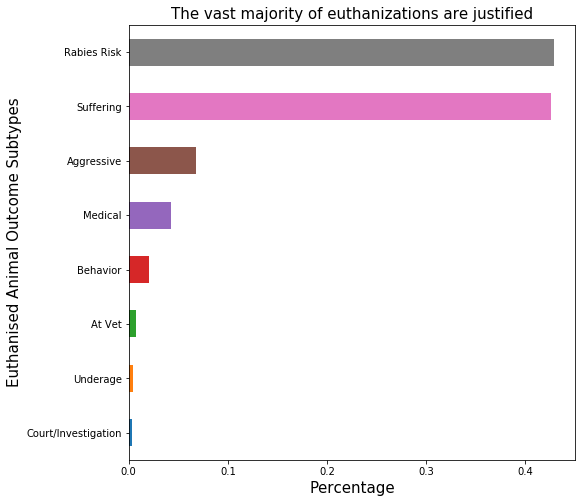

In [32]:
# 6157 / 6334 euthanized animals contain an Outcome Subtype

# sum(mask["Outcome Subtype"].value_counts()) # 6157

euthanized_subtype_count = mask["Outcome Subtype"].value_counts(normalize = True).reset_index().sort_values(by = "Outcome Subtype")

euthanized_subtype_count.plot(kind = "barh", x = "index", y = "Outcome Subtype", figsize = (8, 8), legend = False)

plt.xlabel("Percentage", fontsize = 15)
plt.ylabel("Euthanised Animal Outcome Subtypes", fontsize = 15)
plt.title("The vast majority of euthanizations are justified", fontsize = 15)

plt.show()


In [33]:
# Examing euthanized breeds: bats, cats, raccoons, pit bulls, opossums...

mask["Breed"].value_counts(normalize = True);

In [34]:
mask_breed_count = mask["Breed"].value_counts(normalize = True).reset_index().head(10)
mask_breed_count;

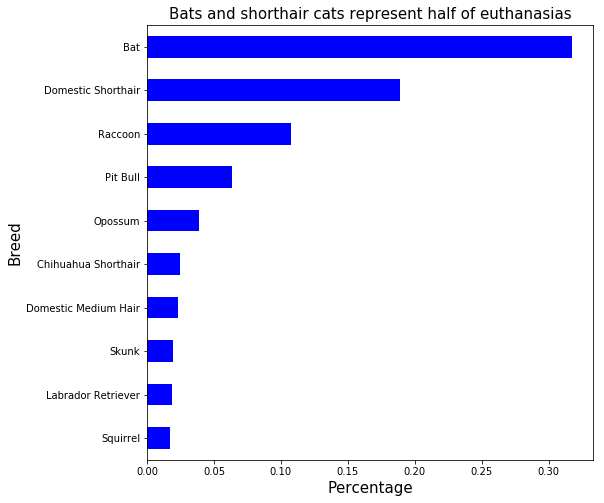

In [35]:
# Plotting top features

breed_features_top = mask_breed_count.sort_values("Breed", ascending = False).head(10)

breed_features_top = mask_breed_count.sort_values("Breed", ascending = True)

breed_features_top.plot(kind = "barh", x = "index", y = "Breed", legend = False, color = "blue", figsize=(8, 8))

plt.xlabel("Percentage", fontsize = 15)
plt.ylabel("Breed", fontsize = 15)
plt.title("Bats and shorthair cats represent half of euthanasias", fontsize = 15)

plt.show()

***Breed***

In [36]:
# 1996 unique breeds

animals_graphing["Breed"].nunique();

In [37]:
animals_graphing["Breed"].value_counts().head(30)

animals_graphing["Breed"].value_counts(normalize = True).head(30);

sum(animals_graphing["Breed"].value_counts(normalize = True).head(30)); # Top 30 account for 77% of all breeds